In [105]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
#pd.options.display.max_rows = 100
import seaborn as sns 
import indicoio
import sys
sys.path.append("../../Code")
import utils
sys.path.append("../../Tools/python-client")
from __future__ import print_function
import time
from pprint import pprint
import settings as s
import images as im
import cognitive as cog
import files as f
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
review_diff = pd.read_csv('../8/reviews_linguistic.csv', index_col=0)

In [107]:
airbnb_diff = pd.read_csv('../8/airbnb_vocab.csv', index_col=0)

In [108]:
satisfaction = pd.read_csv("../7/satisfaction_scores.csv", index_col=0)

In [109]:
# cntry_features = list(set(cultural_diff.columns)-{'id', 'satisfaction'})
# review_features = list(set(review_diff.columns)-{'id'})
# airbnb_features = list(set(airbnb_diff.columns)-{'id'})

#features = demo_features #+ cntry_features +  airbnb_features 

# test = test.join(cultural_diff[['id']+cntry_features].set_index('id'), on='id')
# test = test.join(airbnb_diff[['id']+airbnb_features].set_index('id'), on='id')
# test = test.join(review_diff[['id']+review_features].set_index('id'), on='id')



# Demographic features

In [110]:
demo_sat = satisfaction.copy()

In [111]:
demo_sat['satisfaction'] = np.arcsin(demo_sat['satisfaction'])
demo_sat['relative_satisfaction'] = np.arcsin(demo_sat['relative_satisfaction'])

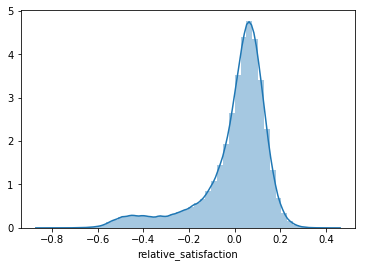

In [112]:
sns.distplot(demo_sat['relative_satisfaction'])
plt.show()

In [165]:
demo_cog = pd.read_csv("../3/demo_reviews.csv", index_col=0)
demo_cog['same_gender'] = [isSameGender(g) if g != None else None  for g in demo_cog['gender-match']]
demo_sight = pd.read_csv("../3/ethnics_emotion.csv", index_col=0)
demo = demo_cog.join(demo_sight.set_index('id'), on='id').dropna()
demo = demo[demo.id.isin(ids)]
demo_abs = demo_cog.copy()

demo_cog_features = ['age-diff', 'gender-match']
demo_features = ['age-diff', 'same_gender', 'ethnicity']
demo_sight_features = ['ethnicity', 'gender']
demo_diversity = ['age-range', 'gender-var']
demo_abs['age-diff'] = np.abs(demo_abs[demo_cog_features]['age-diff'])

demo_nominal_columns = ['gender-match']

In [166]:
demo_test = demo[demo.id.isin(ids)]

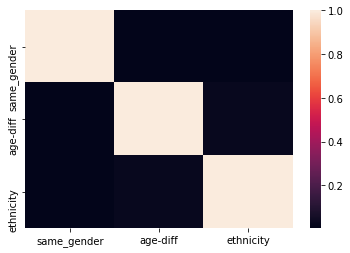

,same_gender,age-diff,ethnicity
same_gender,1,0.00457095,0.00679435
age-diff,0.00457095,1,0.0242762
ethnicity,0.00679435,0.0242762,1


          cols       vif
0  same_gender  1.468622
1     age-diff  1.004194
2    ethnicity  1.470949
Remaining variables:
Index(['same_gender', 'age-diff', 'ethnicity'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     3038.
Date:                Fri, 24 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:39:26   Log-Likelihood:                -3352.6
No. Observations:                4344   AIC:                             6711.
Df Residuals:                    4341   BIC:                             6730.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef   

In [167]:
analysis.test_features(demo, demo_features, demo_sat,  vif_thresh=5)

## Country Information

ensure that when doing cultural differences that Nan is not turning into NAN . check that matching up of results is correct 

In [168]:
cultural_diff_original = pd.read_csv("../9/cultural_diff.csv", index_col=0)

In [169]:
cultural_diff_features = [ 'diff_power', 'diff_individualism']
country_features = ['same_region', 'latlng_dist', 'h_visit_g_region'] #'same_country','same_subregion', 'h_visit_g_cntry', 'h_visit_g_sregion'] 
diversity_features = ['h_min_used', 'h_min_cntry', 'h_min_regions', 'h_min_subregions'] # host has hosted people of different languages, ->smaller study (ages, ethnicity, gender)


In [170]:
#cultural_diff = cultural_diff[['id']+cultural_diff_features]
cultural_diff = cultural_diff_original[['id']+country_features+cultural_diff_features]

In [171]:
cultural_diff['latlng_dist'] =  utils.minmaxscale(cultural_diff['latlng_dist'])

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
cultural_diff = cultural_diff[cultural_diff.id.isin(ids)]

In [177]:
cult_sat = cultural_diff[['id']].join(satisfaction[['id', 'satisfaction', 'relative_satisfaction']].set_index('id'), on='id')

In [178]:
cult_sat['satisfaction'] = np.arcsin(cult_sat['satisfaction'])
cult_sat['relative_satisfaction'] = np.arcsin(cult_sat['relative_satisfaction'])

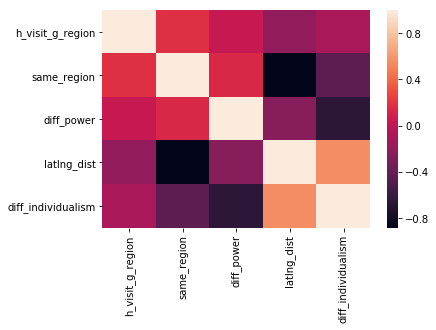

,h_visit_g_region,same_region,diff_power,latlng_dist,diff_individualism
h_visit_g_region,1,0.181348,0.0373651,-0.193827,-0.092386
same_region,0.181348,1,0.140195,-0.881954,-0.432092
diff_power,0.0373651,0.140195,1,-0.241576,-0.656591
latlng_dist,-0.193827,-0.881954,-0.241576,1,0.557534
diff_individualism,-0.092386,-0.432092,-0.656591,0.557534,1


                 cols       vif
0    h_visit_g_region  1.349600
1         same_region  1.351349
2          diff_power  1.917021
3         latlng_dist  2.027450
4  diff_individualism  3.303764
Remaining variables:
Index(['h_visit_g_region', 'same_region', 'diff_power', 'latlng_dist',
       'diff_individualism'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     8056.
Date:                Fri, 24 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:41:21   Log-Likelihood:                -747.95
No. Observations:                4344   AIC:                             1506.
Df Residuals:                    4339   BIC:                             1538.
Df Model:                       

In [179]:
analysis.test_features(cultural_diff, country_features+cultural_diff_features, cult_sat,  vif_thresh=5)

# Airbnb 

In [180]:
airbnb_diff = pd.read_csv('../8/airbnb_vocab.csv', index_col=0)

In [181]:
airbnb_diff_features = list(set(airbnb_diff.columns) - set(['id']))

In [182]:
len(airbnb_diff)

93826

In [187]:
#cultural_diff = cultural_diff[['id']+cultural_diff_features]
airbnb_diff = airbnb_diff[['id']+airbnb_diff_features]
airbnb_diff = airbnb_diff[airbnb_diff.id.isin(ids)]

In [188]:
airbnb_sat = airbnb_diff[['id']].join(satisfaction[['id', 'satisfaction', 'relative_satisfaction']].set_index('id'), on='id')

In [189]:
airbnb_sat['satisfaction'] = np.arcsin(airbnb_sat['satisfaction'])
airbnb_sat['relative_satisfaction'] = np.arcsin(airbnb_sat['relative_satisfaction'])

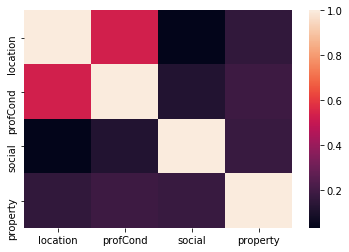

,location,profCond,social,property
location,1,0.533982,0.0329382,0.159536
profCond,0.533982,1,0.122403,0.188493
social,0.0329382,0.122403,1,0.176923
property,0.159536,0.188493,0.176923,1


       cols       vif
0  location  1.453088
1  profCond  1.494527
2    social  1.646270
3  property  1.701968
Remaining variables:
Index(['location', 'profCond', 'social', 'property'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1862.
Date:                Fri, 24 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:43:22   Log-Likelihood:                -3639.6
No. Observations:                4344   AIC:                             7287.
Df Residuals:                    4340   BIC:                             7313.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
         

In [190]:
analysis.test_features(airbnb_diff, airbnb_diff_features, airbnb_sat,  vif_thresh=10)

# Host_diversity

In [191]:
div_1 = demo_cog[['id']+demo_diversity]

In [192]:
div_2 = cultural_diff_original[['id']+diversity_features]

In [193]:
diversity = div_2.join(div_1.set_index('id'), on='id').dropna()
diversity = diversity[diversity.id.isin(ids)]

In [194]:
diversity_sat = diversity[['id']].join(satisfaction[['id', 'satisfaction', 'relative_satisfaction']].set_index('id'), on='id')

In [195]:
diversity_sat['satisfaction'] = np.arcsin(diversity_sat['satisfaction'])
diversity_sat['relative_satisfaction'] = np.arcsin(diversity_sat['relative_satisfaction'])

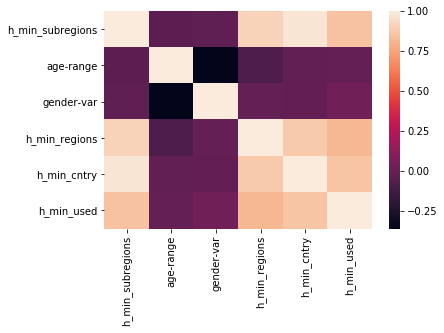

,h_min_subregions,age-range,gender-var,h_min_regions,h_min_cntry,h_min_used
h_min_subregions,1,-0.0330874,-0.0234521,0.912424,0.977677,0.851561
age-range,-0.0330874,1,-0.362415,-0.08297,-0.0193889,-0.00961316
gender-var,-0.0234521,-0.362415,1,-0.00973172,-0.012059,0.026366
h_min_regions,0.912424,-0.08297,-0.00973172,1,0.880215,0.816174
h_min_cntry,0.977677,-0.0193889,-0.012059,0.880215,1,0.858837
h_min_used,0.851561,-0.00961316,0.026366,0.816174,0.858837,1


               cols        vif
0  h_min_subregions  42.517905
1         age-range   1.804621
2        gender-var   1.648931
3     h_min_regions   8.976993
4       h_min_cntry  33.315673
5        h_min_used   5.493204
dropping 'h_min_subregions' at index: 0
            cols       vif
0      age-range  1.800016
1     gender-var  1.644904
2  h_min_regions  6.552070
3    h_min_cntry  8.079330
4     h_min_used  5.491238
Remaining variables:
Index(['age-range', 'gender-var', 'h_min_regions', 'h_min_cntry',
       'h_min_used'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     6491.
Date:                Fri, 24 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:44:17   Log-Likelihood:

In [196]:
analysis.test_features(diversity, diversity_features+demo_diversity, diversity_sat,  vif_thresh=10)

# Personality 

In [197]:
personality_diff = pd.read_csv('../8/reviews_linguistic.csv', index_col=0)

In [198]:
personality_diff_features = list(set(personality_diff.columns) - set(['id']))

In [199]:
len(personality_diff)

93826

In [201]:
#cultural_diff = cultural_diff[['id']+cultural_diff_features]
personality_diff = personality_diff[['id']+personality_diff_features]
personality_diff = personality_diff[personality_diff.id.isin(ids)]

In [202]:
personality_sat = personality_diff[['id']].join(satisfaction[['id', 'satisfaction', 'relative_satisfaction']].set_index('id'), on='id')

In [203]:
personality_sat['satisfaction'] = np.arcsin(personality_sat['satisfaction'])
personality_sat['relative_satisfaction'] = np.arcsin(personality_sat['relative_satisfaction'])

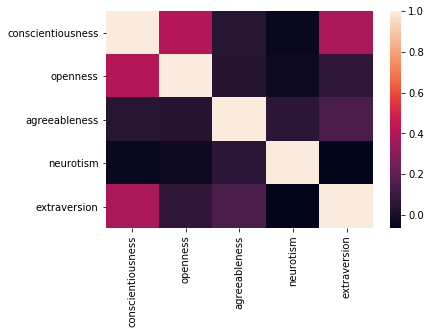

,conscientiousness,openness,agreeableness,neurotism,extraversion
conscientiousness,1,0.404838,0.0433519,-0.0451089,0.3817
openness,0.404838,1,0.0338057,-0.0301121,0.0699428
agreeableness,0.0433519,0.0338057,1,0.0584335,0.144923
neurotism,-0.0451089,-0.0301121,0.0584335,1,-0.0662866
extraversion,0.3817,0.0699428,0.144923,-0.0662866,1


                cols       vif
0  conscientiousness  3.528728
1           openness  2.740375
2      agreeableness  2.205593
3          neurotism  1.922734
4       extraversion  2.833663
Remaining variables:
Index(['conscientiousness', 'openness', 'agreeableness', 'neurotism',
       'extraversion'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3766.
Date:                Fri, 24 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:45:07   Log-Likelihood:                -2171.2
No. Observations:                4344   AIC:                             4352.
Df Residuals:                    4339   BIC:                             4384.
Df Model:                           5        

In [204]:
analysis.test_features(personality_diff, personality_diff_features, personality_sat,  vif_thresh=10)

# Join 

In [205]:
a = personality_diff.join(diversity[['id']+diversity_features+demo_diversity].set_index('id'), on='id').join(airbnb_diff[['id']+airbnb_diff_features].set_index('id'), on='id').join(cultural_diff[['id']+country_features+cultural_diff_features].set_index('id'), on='id').join(demo[['id']+demo_features].set_index('id'), on='id')
                                                           
                                
                                
                                
                                

In [206]:
all_features = list(set(a.columns) - set(['id']))

In [207]:
len(a)

4344

In [208]:
#cultural_diff = cultural_diff[['id']+cultural_diff_features]
all_diff = a[['id']+all_features]

In [226]:
all_sat = all_diff[['id']].join(satisfaction[['id', 'satisfaction', 'relative_satisfaction']].set_index('id'), on='id')

In [227]:
all_sat['satisfaction'] = np.arcsin(all_sat['satisfaction'])**2
all_sat['relative_satisfaction'] = np.arcsin(all_sat['relative_satisfaction'])

In [228]:
ids = set(all_diff.dropna()['id'])

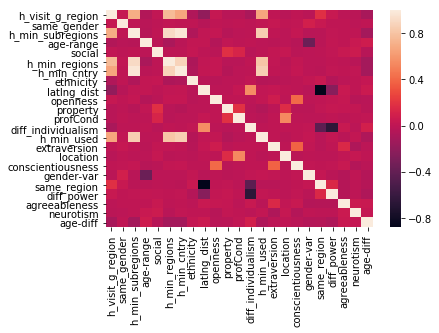

,h_visit_g_region,same_gender,h_min_subregions,age-range,social,h_min_regions,h_min_cntry,ethnicity,latlng_dist,openness,property,profCond,diff_individualism,h_min_used,extraversion,location,conscientiousness,gender-var,same_region,diff_power,agreeableness,neurotism,age-diff
h_visit_g_region,1,0.0345352,0.696302,-0.0573537,0.0111559,0.757478,0.66548,-0.0618962,-0.193827,0.0355955,-0.0283769,-0.0237749,-0.092386,0.667453,0.00223452,-0.0248212,0.00733106,-0.0196951,0.181348,0.0373651,-0.0116744,-0.0174875,-0.0968862
same_gender,0.0345352,1,0.00203499,-0.0279129,-0.00584196,0.0104422,0.0024432,0.00679435,-0.0293984,0.00442041,-0.0058536,0.00610107,-0.00262334,0.0132455,0.0329687,0.000867732,0.0136414,0.0948091,0.0372669,0.00457285,0.000966499,-0.00917676,0.00457095
h_min_subregions,0.696302,0.00203499,1,-0.0330874,0.0015562,0.912424,0.977677,-0.065632,0.0130665,0.0228463,-0.0332595,-0.0114405,-0.00596114,0.851561,0.00716048,-0.00796439,0.0237544,-0.0234521,-0.0157398,0.0147191,0.00117514,0.00100101,-0.112177
age-range,-0.0573537,-0.0279129,-0.0330874,1,-0.00874715,-0.08297,-0.0193889,0.0221595,0.0219381,-0.0453723,0.0148345,-0.00591949,0.00315288,-0.00961316,-0.0174439,-0.0115153,-0.0315454,-0.362415,-0.0200928,0.0165718,0.00584055,0.0504296,0.0718267
social,0.0111559,-0.00584196,0.0015562,-0.00874715,1,-0.0008446,-0.0024821,0.0253508,-0.00107343,-0.0194297,0.176923,0.122403,-0.0254029,-0.00456495,0.0201967,0.0329382,-0.0176671,-0.0101389,-0.00262724,0.0132828,0.0379086,0.0643665,-0.0360273
h_min_regions,0.757478,0.0104422,0.912424,-0.08297,-0.0008446,1,0.880215,-0.0784718,0.0123755,0.0275801,-0.0222812,-0.0258774,0.00718555,0.816174,0.0107806,-0.0181763,0.0195272,-0.00973172,-0.00935991,0.00419529,-0.0030987,-0.0255305,-0.116282
h_min_cntry,0.66548,0.0024432,0.977677,-0.0193889,-0.0024821,0.880215,1,-0.0613451,0.0155008,0.0229113,-0.0385307,-0.0137482,-0.00379368,0.858837,0.00710648,-0.00789183,0.0233826,-0.012059,-0.0180018,0.0112126,0.00041803,0.00803552,-0.116768
ethnicity,-0.0618962,0.00679435,-0.065632,0.0221595,0.0253508,-0.0784718,-0.0613451,1,-0.0219458,-0.0272059,-0.0124617,-0.0139488,0.0110848,-0.0438964,-0.0298359,-0.0190339,-0.00236727,0.0206069,0.0451242,-0.0495337,-0.00984881,0.00053764,0.0242762
latlng_dist,-0.193827,-0.0293984,0.0130665,0.0219381,-0.00107343,0.0123755,0.0155008,-0.0219458,1,-0.0131009,-0.0081875,0.0246605,0.557534,0.0140757,0.0236963,0.00666078,-0.00228925,-0.0233984,-0.881954,-0.241576,0.0465923,0.00529509,0.0558268
openness,0.0355955,0.00442041,0.0228463,-0.0453723,-0.0194297,0.0275801,0.0229113,-0.0272059,-0.0131009,1,0.00298742,0.00531685,-0.0114105,0.0192963,0.0699428,-0.000993699,0.404838,-0.0067912,0.00433757,0.0163082,0.0338057,-0.0301121,-0.0260226


                  cols        vif
0     h_visit_g_region   3.562374
1          same_gender   2.180317
2     h_min_subregions  42.843155
3            age-range   6.961997
4               social   2.362056
5        h_min_regions  10.956884
6          h_min_cntry  33.833892
7            ethnicity   2.379201
8          latlng_dist   5.633044
9             openness   3.033857
10            property   2.223956
11            profCond   1.506279
12  diff_individualism   3.325895
13          h_min_used   5.758464
14        extraversion   3.155016
15            location   1.459456
16   conscientiousness   3.627743
17          gender-var   2.396702
18         same_region   7.820063
19          diff_power   1.937135
20       agreeableness   2.495878
21           neurotism   2.511717
22            age-diff   1.043953
dropping 'h_min_subregions' at index: 2
                  cols       vif
0     h_visit_g_region  3.550904
1          same_gender  2.180274
2            age-range  6.961783
3           

In [229]:
analysis.test_features(all_diff, all_features, all_sat,  vif_thresh=5)

In [230]:
all_sat

,id,satisfaction,relative_satisfaction
604,538536,0.710114,-0.064052
609,740445,1.199681,0.078707
624,20283974,0.772355,-0.040453
627,21844067,1.103835,0.057331
637,32966137,0.641369,-0.092620
649,68477933,0.867656,-0.007935
673,120732928,1.330690,0.103958
698,246562284,0.682749,-0.075090
699,249014158,1.009710,0.033645
704,268680432,1.063377,0.047495


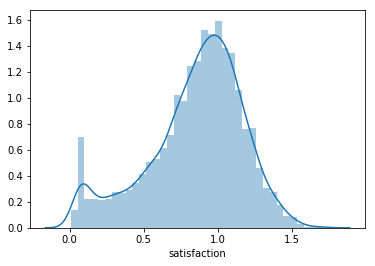

In [217]:
sns.distplot(all_sat.satisfaction**2)
plt.show()

## Extra 

In [138]:
empty_prof = test_1[test_1.latlng_dist.isnull()][['id']].join(demo_cog.set_index('id'), on='id').reviewer_id.unique()

NameError: name 'test_1' is not defined

In [ ]:
len(empty_prof)

In [ ]:
237671 in empty_prof

In [ ]:
guests[guests['id'].isin(empty_prof)]

In [ ]:
guests['id'] = guests['id'].astype(int)

In [ ]:
guests = pd.read_csv('../2/man_guests.csv', low_memory=False, index_col=0)

In [116]:
guests[guests['id'].isin(empty_prof)].to_csv('find_profiles.csv')